In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix



In [4]:
df= pd.read_csv("income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [8]:
df[' income'].unique()

#OR

np.unique(df[' income'])

array([' <=50K', ' >50K'], dtype=object)

In [9]:
np.unique(df[' marital-status'])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

In [10]:
# Dropping Unnecessary column
df.drop(columns=' fnlwgt',inplace=True)

Renaming the column by removig the extra space

In [11]:
df.columns=['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income']

In [12]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [13]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# First strip off the spaces from object type

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [15]:
strip_column=['workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex','native-country', 'income']

In [16]:
for i in strip_column:
    df[i]= df[i].str.strip()

In [17]:
np.unique(df.workclass)

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [18]:
# Here cut fx is used fro groupping by age 16-24, 25-63, 64-90

bins=[16,25,64,90]
labels=['young','adult','old']
df['age_type']=pd.cut(df['age'],bins=bins,labels=labels)
df['income_num']=np.where(df['income']=='>50K',1,0)


In [19]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_type,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,adult,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,adult,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,adult,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,young,0


In [20]:
df['income_num'].unique()

array([0, 1])

# Segregating categorical values and Numerical values

In [21]:
df.dtypes

age                  int64
workclass           object
education           object
education-num        int64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income              object
age_type          category
income_num           int64
dtype: object

In [22]:
# First method to identify categorical
categorical_column=[]
for cat in df.columns:
    if df[cat].dtype =='O':
        categorical_column.append(i)

In [23]:
# second Lets try to write same column in single line

categorical_column=[cat for cat in df.columns if df[cat].dtype=='O']
categorical_column

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [24]:
# Numerical
numerical_column=[num for num in df.columns if df[num].dtype== 'int64']
numerical_column

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_num']

# Just checking how cells are missing 

In [25]:
for cat in categorical_column:
    print(df[cat].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

 We can see that in the above data there are many rows updated with ?. So we will proceed with replacing it NaN to avoid any feature miss which can play a important role

In [26]:
# Replacing ? with NaN
df.loc[df['workclass']=='?', 'workclass']= np.NaN


In [27]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [28]:
# Another method to replace  ? with NaN
df['occupation'].replace('?',np.NaN, inplace=True)

In [29]:
for cat in categorical_column:
    print(df[cat].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         

In [30]:
df['native-country'].replace('?',np.NaN, inplace=True)

# Data Visualizaton

In [31]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_type,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


In [32]:
import matplotlib.pyplot  as plt
import seaborn as sns

<Axes: xlabel='income', ylabel='count'>

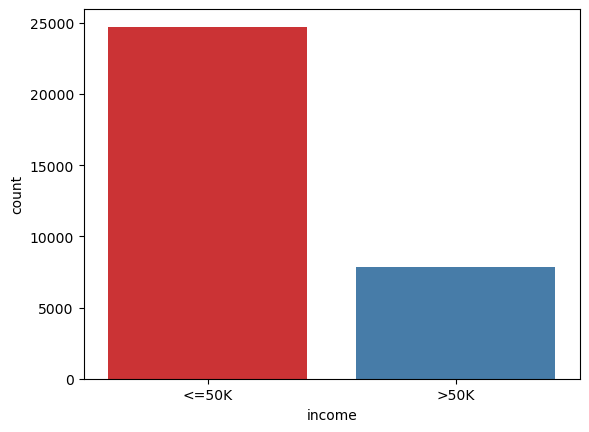

In [33]:

# Plot the histogram with custom colors

sns.countplot(x="income", data=df, palette="Set1")



<Axes: ylabel='count'>

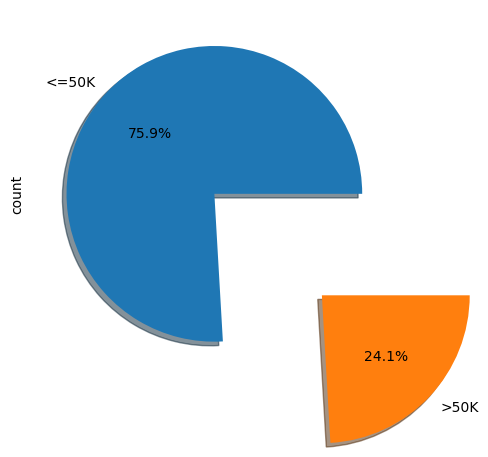

In [34]:
df['income'].value_counts().plot.pie(explode=[0,1],autopct='%1.1f%%',shadow=True)


In [35]:
more_than_50 = df[df['income'] == '>50K']
less_than_50 = df[df['income'] == '<=50K']
print (more_than_50.shape,less_than_50.shape)

(7841, 16) (24720, 16)




Since it is highy imbalanced the machine learning algorithm we use may get biased towards this kind of output (whichever having the higher number of outputs). We will try to balance this dataset later


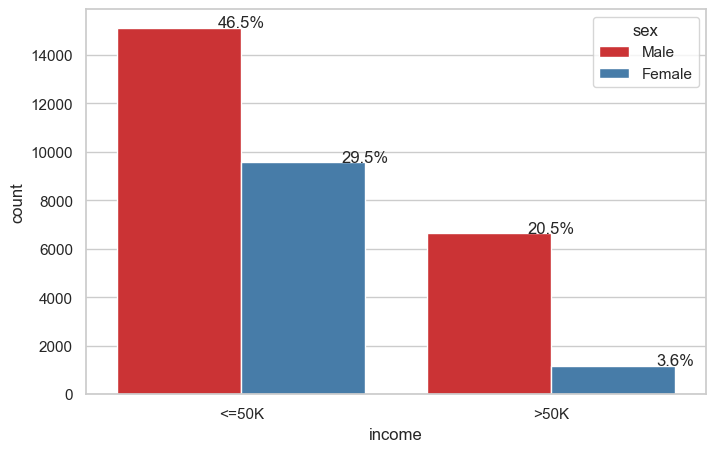

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="income", hue="sex", data=df,palette='Set1')
#plt.title('No. of Smokers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Conclusion: Male's seems to earn more than female in both the income categories

Text(0.5, 1.0, 'Frequency distribution of income VS race')

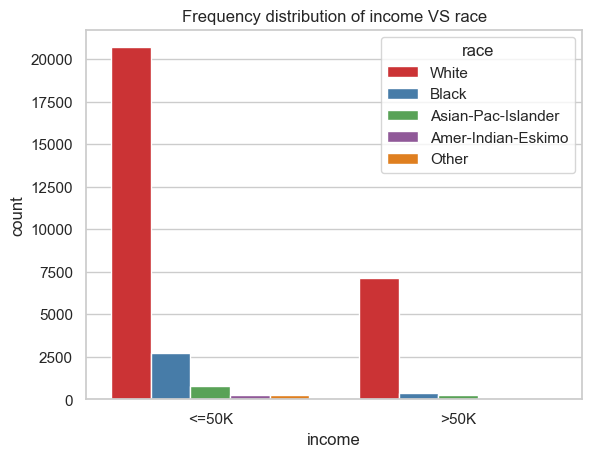

In [37]:
from turtle import title


sns.countplot(x='income',hue='race',data=df,palette='Set1')
plt.title("Frequency distribution of income VS race")


Conclusion: We can see that whites make more money than non-whites in both the income categories.

<Axes: xlabel='income', ylabel='count'>

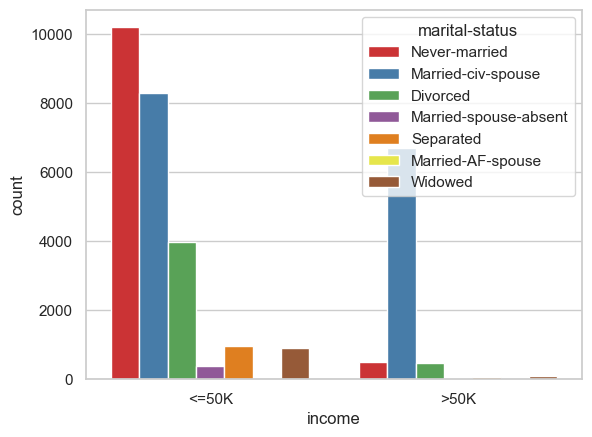

In [38]:
sns.countplot(x='income',hue='marital-status',data=df, palette='Set1')

Conclusion: Unmarried earn less than 50k on the other side people who are married earn more. Could be because they have less experiance wrt age. 


Text(0.5, 1.0, 'Frequency distribution of income variable vs  education level')

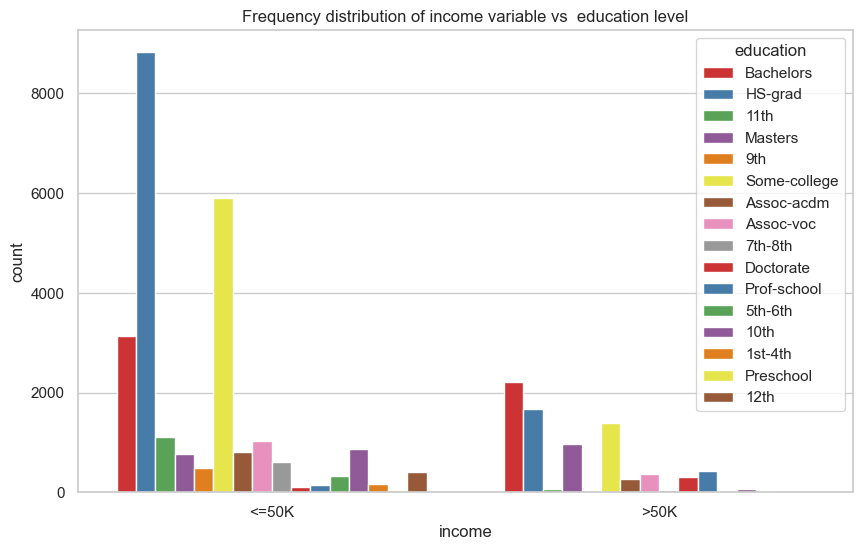

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x="income", hue="education", data=df, palette="Set1")
plt.title("Frequency distribution of income variable vs  education level")

# Lets try some tips and conditional tricks

Text(0.5, 1.0, 'count of marital-status (>=50K and HS-grad)')

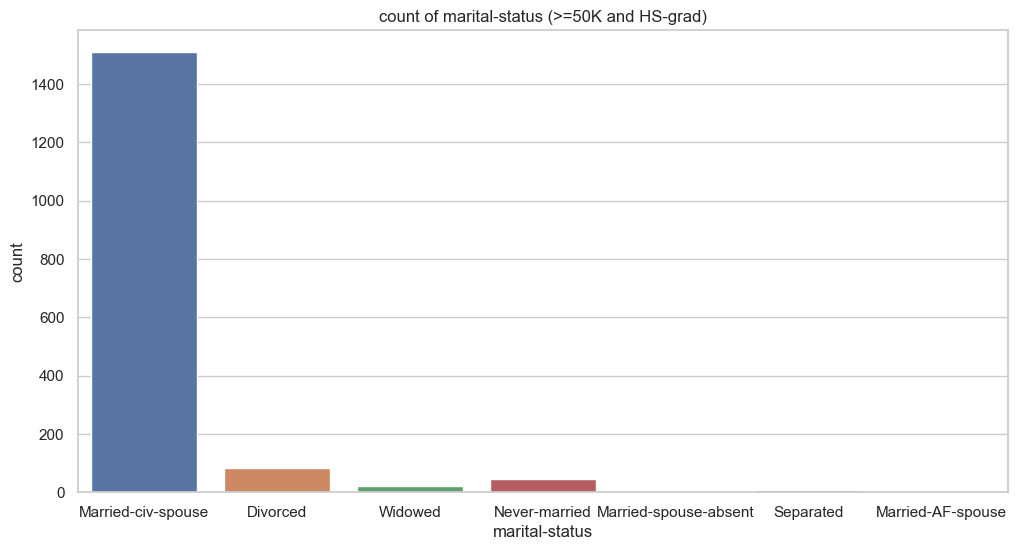

In [40]:
# Create subset where income is '>=50K' and education is 'HS-grad'
temp2 = df.loc[(df['income'] == '>50K') & (df['education'] == 'HS-grad')]

plt.figure(figsize=(12, 6))
# Create count plot
sns.countplot(x='marital-status', data=temp2)

# Adding title
plt.title('count of marital-status (>=50K and HS-grad)')

# Numerical columns

In [41]:
numerical_column

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_num']

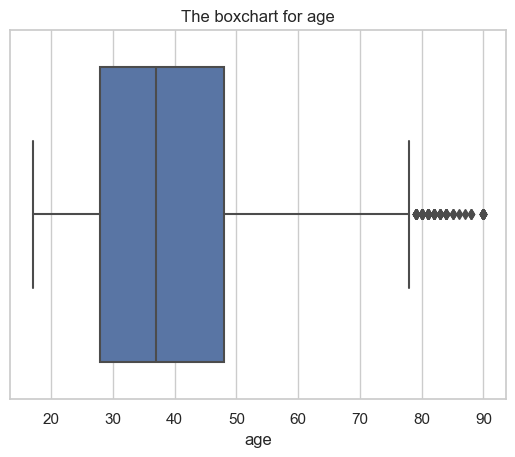

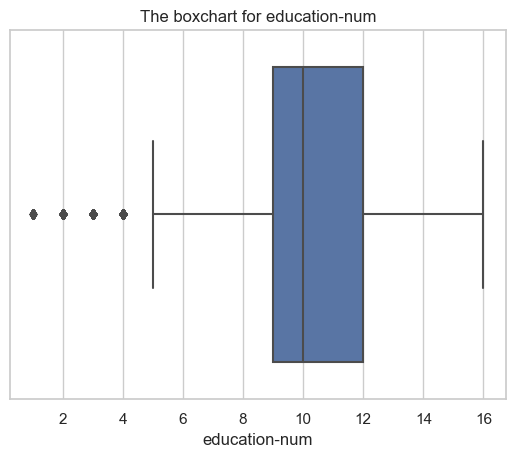

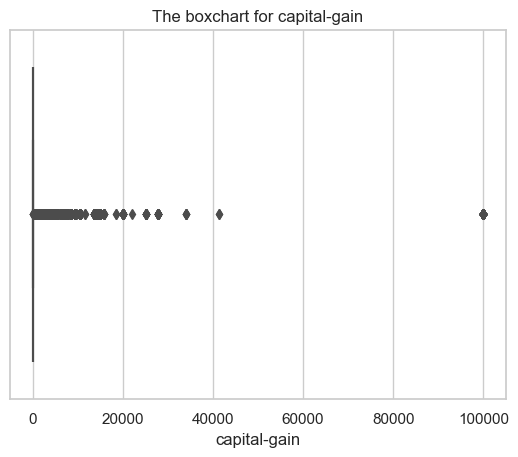

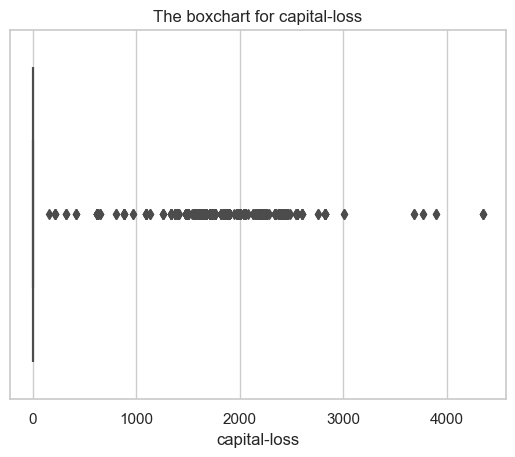

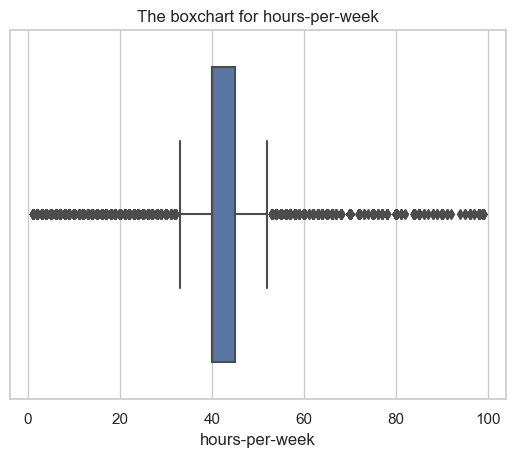

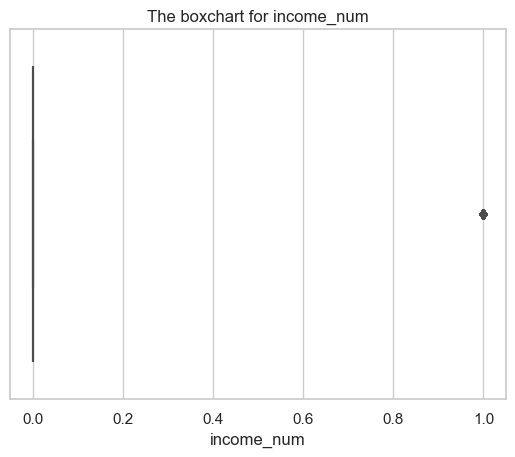

In [42]:
for i in numerical_column:
    sns.boxplot(x=df[i], data=df, order=df[i].value_counts().index)
    plt.title("The boxchart for {}".format(i))
    plt.show()

Conclusion: We see there are few outliers in capital gain and capital loss, let's look at these plots closely

<Axes: >

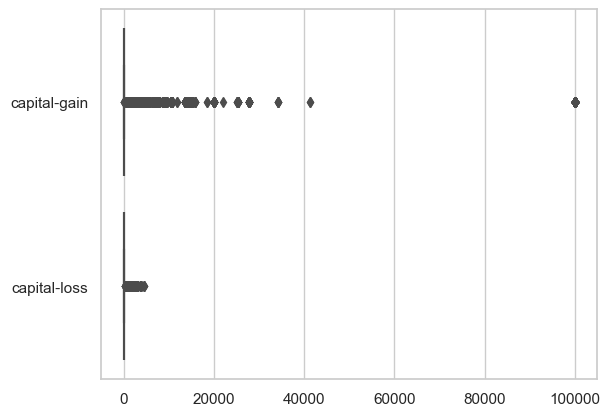

In [43]:
sns.boxplot( data=df[['capital-gain','capital-loss']], orient='h')

In [44]:
# There are two methods to perform the capping for the outlier

#1st
capping_gain= df.loc[(df['capital-gain']>45000,'capital-gain')]=45000

In [45]:
# 2nd

# here if the condition in the argument is true then 40000 else copy the same value of capital-loss

capping_loss= np.where(df['capital-loss']>40000, 40000, df['capital-loss'])

<Axes: >

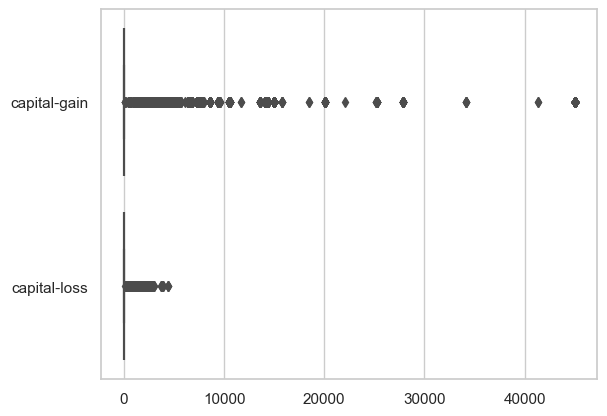

In [46]:
sns.boxplot( data=df[['capital-gain','capital-loss']], orient='h')

Conclusion:  The caping is performed on this feature

/var/folders/kz/nxcwd4813dd6g91xx8hv96740000gn/T/ipykernel_8033/3816823344.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[i], palette='Set1', bins=20)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


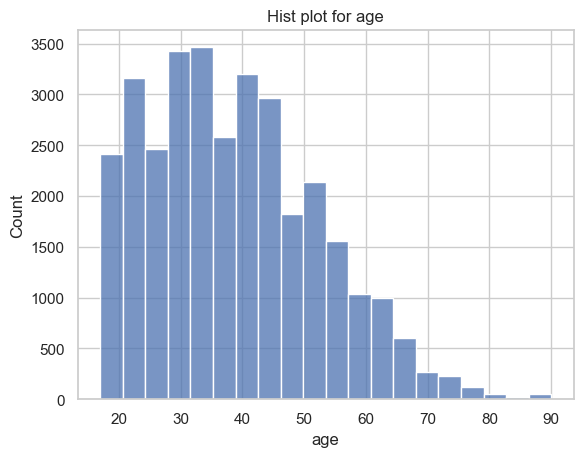

/var/folders/kz/nxcwd4813dd6g91xx8hv96740000gn/T/ipykernel_8033/3816823344.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[i], palette='Set1', bins=20)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


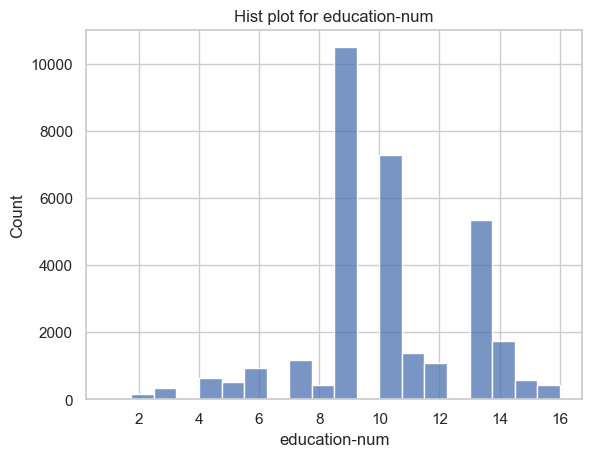

/var/folders/kz/nxcwd4813dd6g91xx8hv96740000gn/T/ipykernel_8033/3816823344.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[i], palette='Set1', bins=20)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


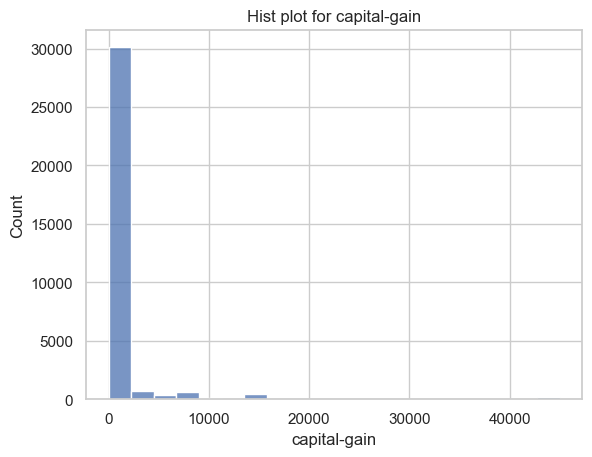

/var/folders/kz/nxcwd4813dd6g91xx8hv96740000gn/T/ipykernel_8033/3816823344.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[i], palette='Set1', bins=20)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


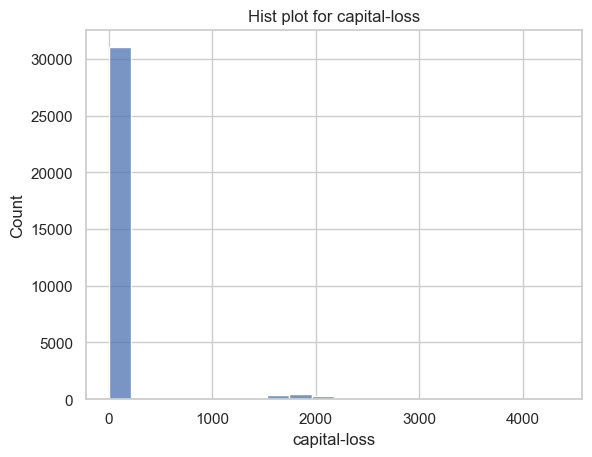

/var/folders/kz/nxcwd4813dd6g91xx8hv96740000gn/T/ipykernel_8033/3816823344.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[i], palette='Set1', bins=20)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


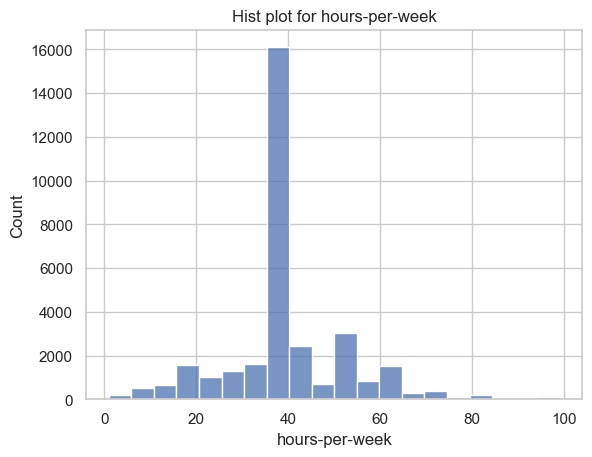

/var/folders/kz/nxcwd4813dd6g91xx8hv96740000gn/T/ipykernel_8033/3816823344.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[i], palette='Set1', bins=20)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


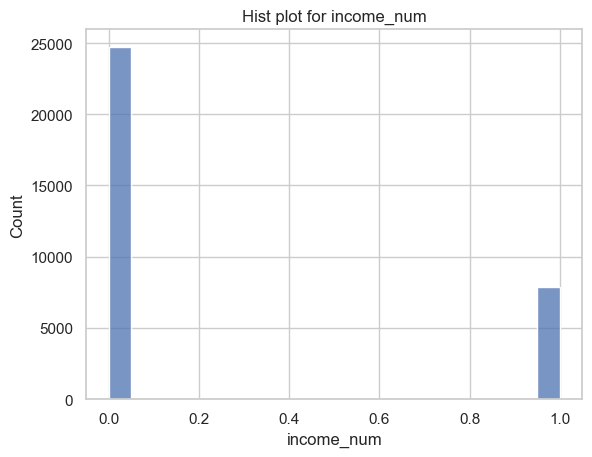

In [47]:
from seaborn import palplot


for i in numerical_column:
    sns.histplot(df[i], palette='Set1', bins=20)
    plt.title(f'Hist plot for {i}')
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

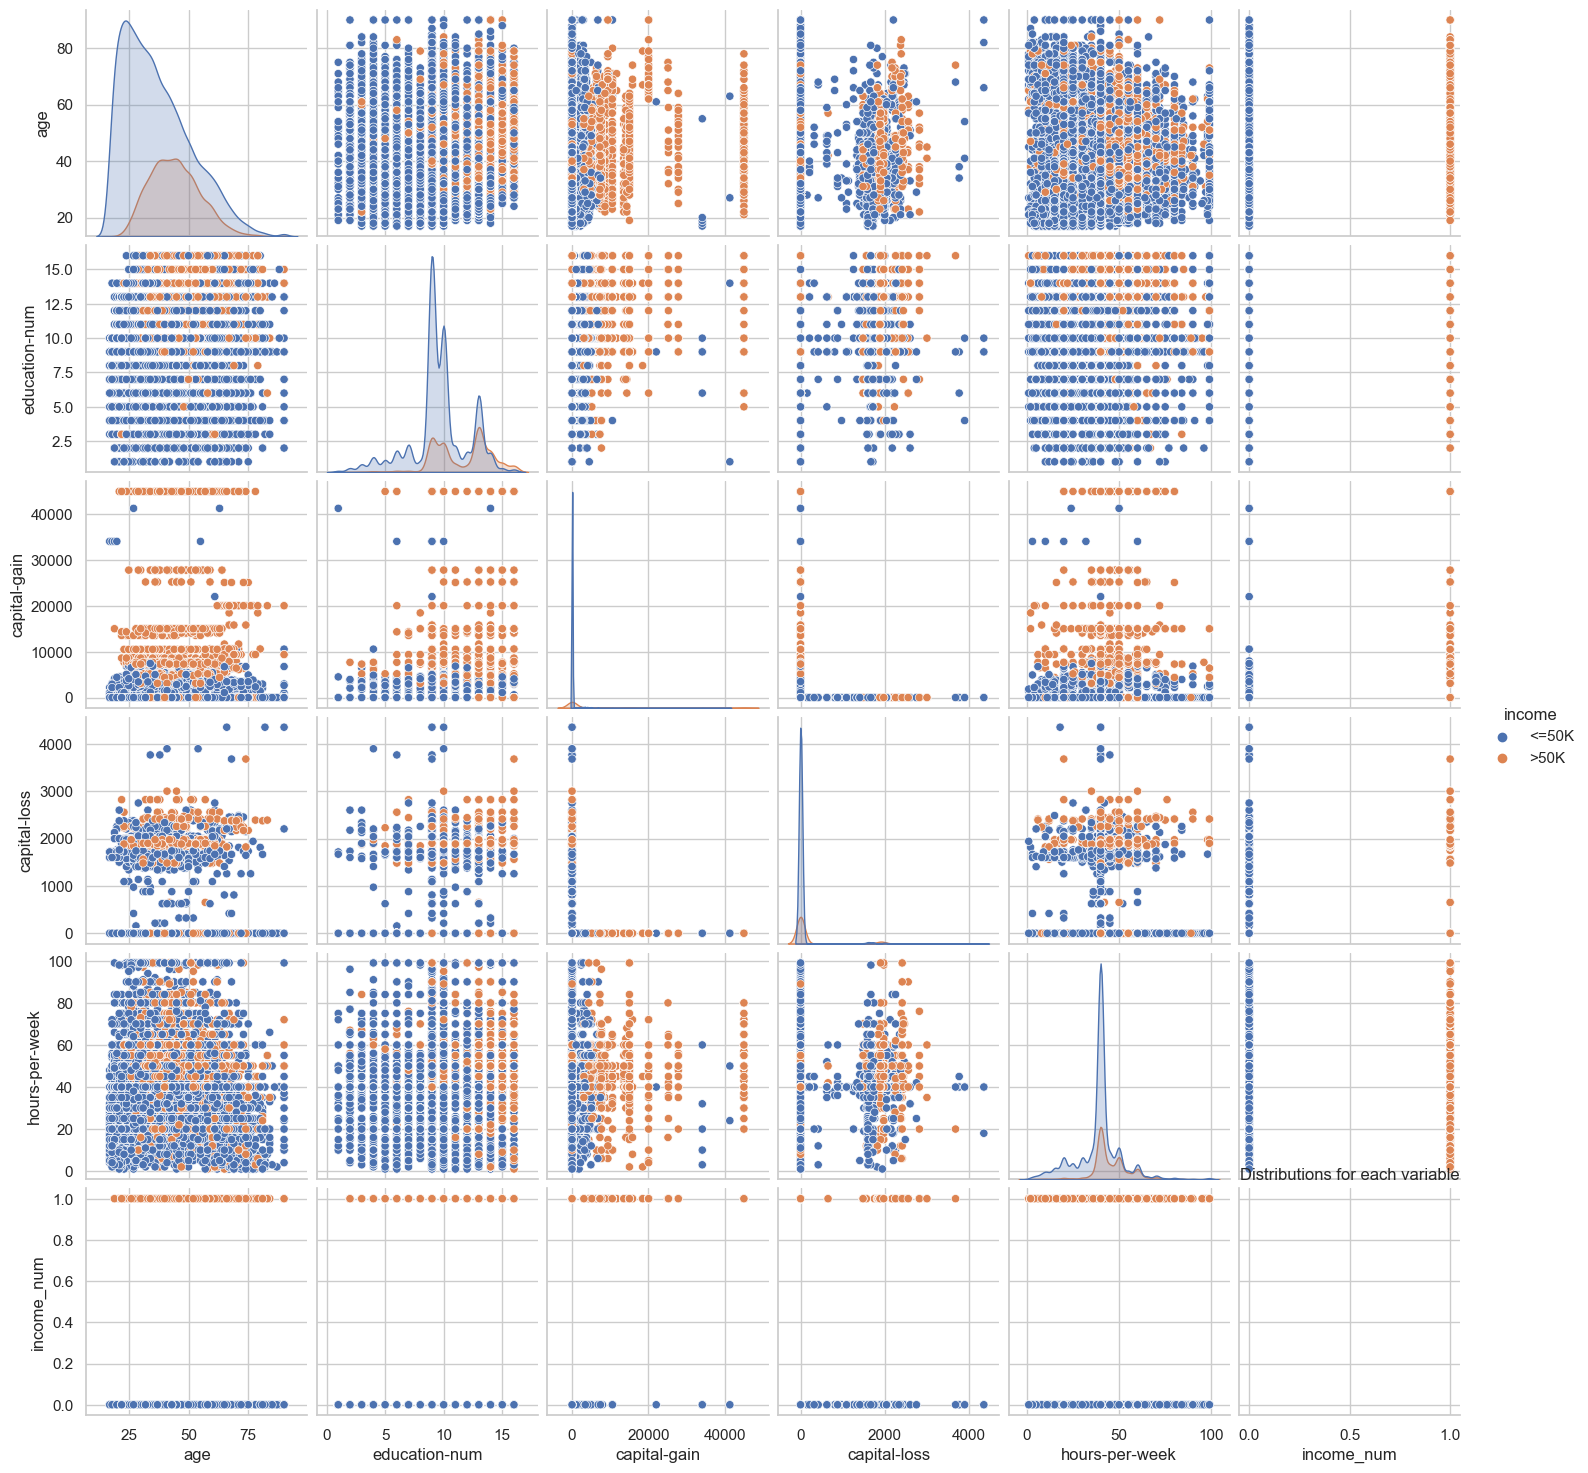

In [48]:
sns.pairplot(df,hue='income')
plt.title('Distributions for each variable')
plt.show()

# Categorical plot at one place

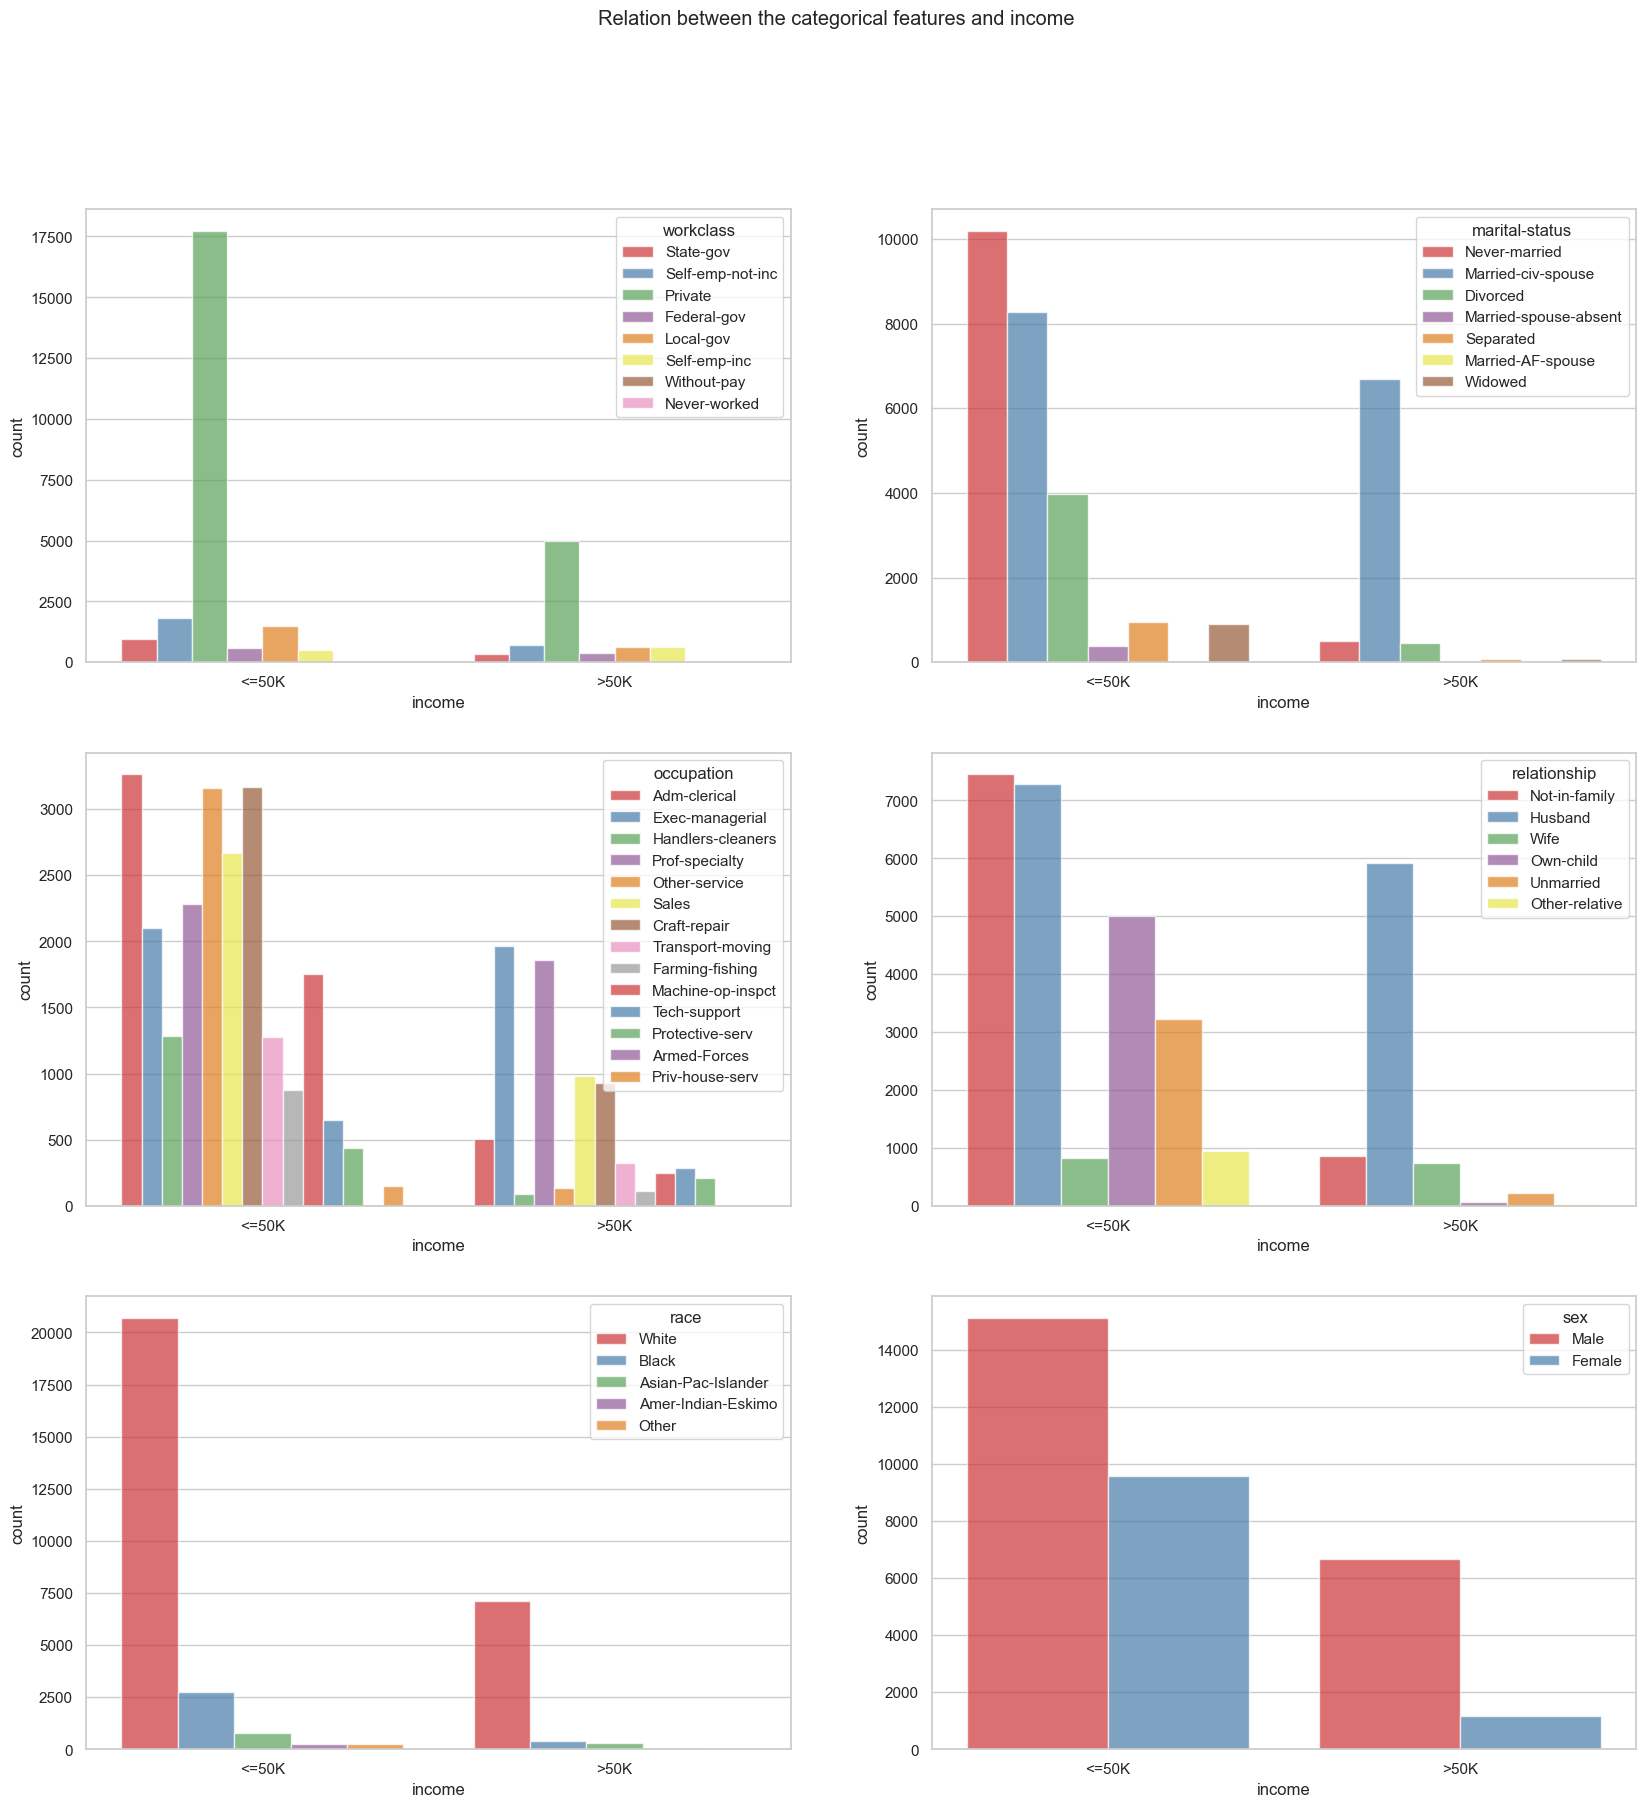

In [49]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relation between the categorical features and income')

categorical_col = ['workclass', 'marital-status','occupation','relationship','race','sex',]
for ax, i in enumerate(categorical_col):
    sns.countplot(x='income', alpha=0.7, hue=i, data=df, ax=axs[ax],palette='Set1')


# Split the data

In [50]:
X = df.drop(columns='income')
y = df['income']

# label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

Lets enjoy with creating the fx for encoding

In [52]:
def label_encoder(a):
    LE= LabelEncoder()
    df[a]=LE.fit_transform(df[a])
    

In [53]:
categorical_column

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [54]:
for i in categorical_column:
    label_encoder(a=i)

In [55]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_type,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [56]:
df.dtypes

age                  int64
workclass            int64
education            int64
education-num        int64
marital-status       int64
occupation           int64
relationship         int64
race                 int64
sex                  int64
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country       int64
income               int64
age_type          category
income_num           int64
dtype: object

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler= MinMaxScaler()

In [59]:
Scaled_data=scaler.fit_transform(df.drop(['income','age_type','income_num'],axis=1))

In [60]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'age_type', 'income_num'],
      dtype='object')

In [61]:
# Now select the columns on which scaling needs to be performed 
columns=['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country']

In [62]:
df_scaled=pd.DataFrame(Scaled_data,columns=columns)
df_scaled.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,0.750,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.048311,0.0,0.397959,0.926829
1,0.452055,0.625,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.0,0.122449,0.926829
2,0.287671,0.375,0.733333,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.000000,0.0,0.397959,0.926829
3,0.493151,0.375,0.066667,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.000000,0.0,0.397959,0.926829
4,0.150685,0.375,0.600000,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.000000,0.0,0.397959,0.097561


# Oversampling to handle imbalanced data

In [63]:
# Dividing the data in X and y so that I can resample both feature and target columns
X= df_scaled

In [64]:
y= df['income']

In [65]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [66]:
Oversampling= SMOTETomek()

In [67]:
X_resampled,y_resampled=Oversampling.fit_resample(X,y,)

In [68]:
X_resampled.shape

(48188, 13)

In [69]:
y_resampled.shape

(48188,)

In [70]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({0: 24720, 1: 7841})
Resampled dataset shape Counter({0: 24094, 1: 24094})


# train_test_split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.20,random_state=101,shuffle=True)



In [73]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (38550, 13)
X_test shape: (9638, 13)
y_train shape: (38550,)
y_test shape: (9638,)


Gradient boosting Machine

In [74]:

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [75]:
print(confusion_matrix(y_test, gbc.predict(X_test)))

[[4142  649]
 [ 506 4341]]


The top-left value (4187) represents the True Negatives (TN). These are the number of instances that the model correctly predicted as negative.

The top-right value (722) represents the False Positives (FP). These are the number of instances that the model incorrectly predicted as positive, but they are actually negative.

The bottom-left value (434) represents the False Negatives (FN). These are the number of instances that the model incorrectly predicted as negative, but they are actually positive.

The bottom-right value (4301) represents the True Positives (TP). These are the number of instances that the model correctly predicted as positive.

In [76]:
y_pred=gbc.predict(X_test)

In [77]:
accuracy_score( y_test, y_pred)

0.8801618593069102

# Parameter tunning for Gradient Boosting

In [78]:
from sklearn.model_selection import GridSearchCV

n_estimator is number of time the week learner is going to get trainied on residual.

In [79]:
# Add the learning rate for better result in the param 'learning_rate':[0.01,0.05,0.1],
grid={ 
      'n_estimators':np.arange(100,500,100),
      'max_depth':[2,3,4,5,6,7]}

In [80]:
gb= GradientBoostingClassifier()

In [81]:
Grid_search_cv=GridSearchCV(gb, param_grid=grid, cv=4)

In [82]:
Grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': array([100, 200, 300, 400])})

In [83]:
Grid_search_cv.best_params_

{'max_depth': 6, 'n_estimators': 400}

In [84]:
print("Best Parameters:",Grid_search_cv.best_params_)

print("Train Score:",Grid_search_cv.best_score_)

print("Test Score:",Grid_search_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 6, 'n_estimators': 400}
Train Score: 0.9140336979825651
Test Score: 0.9168914712595975
